# **Decision Tree regression and Ensemble Methods**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from matplotlib.pyplot import figure

In [2]:
directory = '/home/celestino/Desktop/stat_learning/tabelle/FIFA/FIFA_tables_csv'
file = 'PCAdf.csv'
df = pd.read_csv(f'{directory}/{file}')
#print(df.shape)
#df.head(5)

In [3]:
features = list(df.columns[4:17])

x = df.loc[:, features].values
y = df.loc[:, 'Overall_index'].values

### Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 27)

# **Decision Tree Regression**

In [5]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_depth': [1, 2, 3, 4] }

# Create model
tree_regr = DecisionTreeRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(tree_regr, param_grid, cv = 100)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=100, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4]})

In [6]:
print(grid_search.best_params_)
print(grid_search.cv_results_['mean_test_score'])

{'max_depth': 3}
[0.06719489 0.16296706 0.1775166  0.13181987]


[Text(446.4, 587.0880000000001, 'X[8] <= -4.388\nmse = 37.46\nsamples = 1381\nvalue = 73.797'),
 Text(223.2, 456.624, 'X[8] <= -5.278\nmse = 36.451\nsamples = 296\nvalue = 68.706'),
 Text(111.6, 326.1600000000001, 'X[8] <= -5.847\nmse = 36.276\nsamples = 131\nvalue = 66.641'),
 Text(55.8, 195.69600000000003, 'X[4] <= -0.193\nmse = 23.627\nsamples = 20\nvalue = 62.85'),
 Text(27.9, 65.23200000000008, '\n  (...)  \n'),
 Text(83.69999999999999, 65.23200000000008, '\n  (...)  \n'),
 Text(167.39999999999998, 195.69600000000003, 'X[8] <= -5.341\nmse = 35.498\nsamples = 111\nvalue = 67.324'),
 Text(139.5, 65.23200000000008, '\n  (...)  \n'),
 Text(195.29999999999998, 65.23200000000008, '\n  (...)  \n'),
 Text(334.79999999999995, 326.1600000000001, 'X[1] <= -0.148\nmse = 30.517\nsamples = 165\nvalue = 70.345'),
 Text(279.0, 195.69600000000003, 'X[1] <= -0.215\nmse = 31.75\nsamples = 76\nvalue = 68.987'),
 Text(251.1, 65.23200000000008, '\n  (...)  \n'),
 Text(306.9, 65.23200000000008, '\n  (..

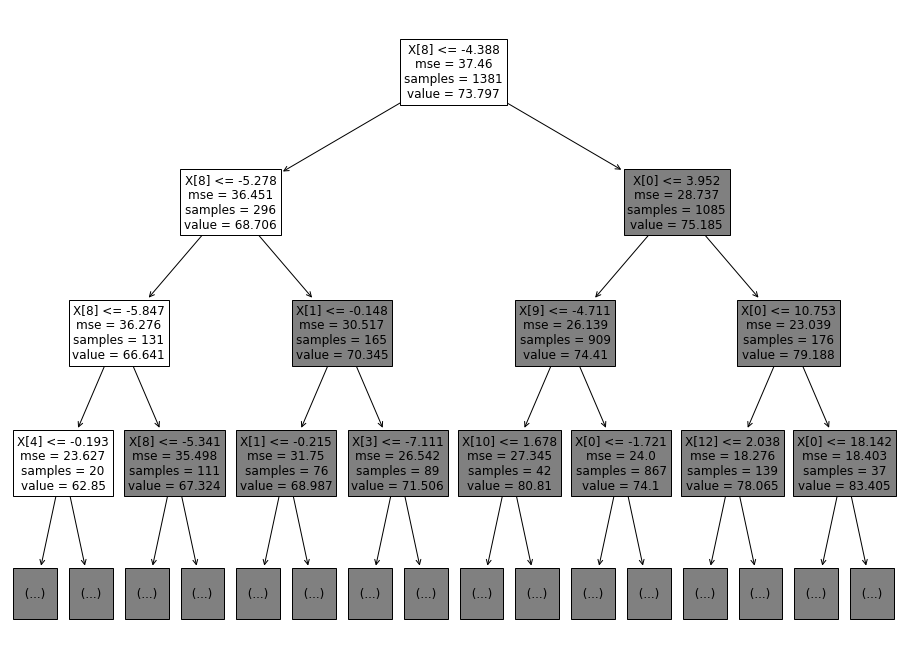

In [7]:
fig, ax = plt.subplots(figsize=(16, 12))
tree.plot_tree(tree_regr.fit(x_train, y_train),  max_depth=3, fontsize=12) 

### Predicting and accuracy check

In [8]:
y_pred = grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 26.81
RMSE: 5.18
MAE: 4.16
MAPE: 5.70
Accuracy: 94.3 %.
R^2: 0.28


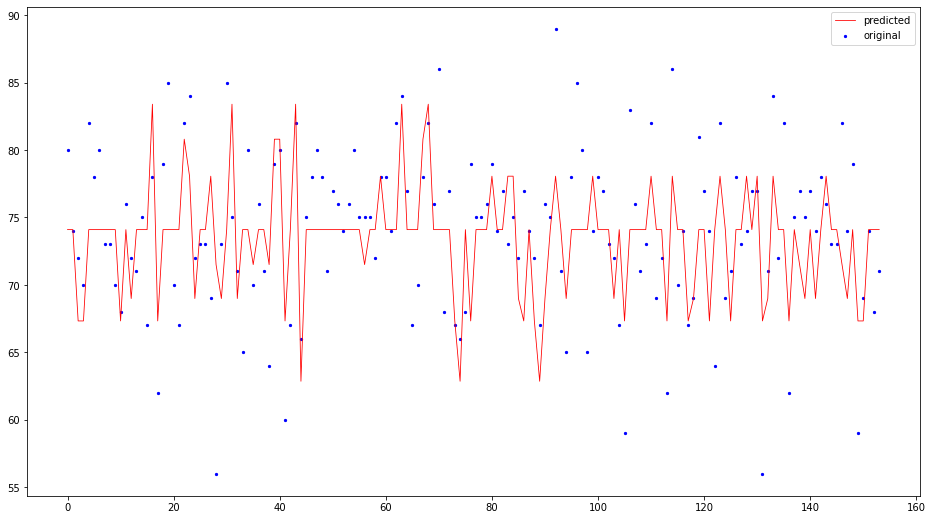

In [9]:
x_ax = range(len(y_test))
figure(figsize=(16, 9))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# **Bagging**

In [10]:
from sklearn.ensemble import BaggingRegressor

param_grid = {'max_features': [0.5, 1.0],
        'max_samples': [0.5, 1.0],
        'n_estimators': [100],
        'oob_score': [True, False]}

# Create model
bagging_reg = BaggingRegressor()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(bagging_reg, param_grid, cv = 100, n_jobs = -1, n_iter = 6, random_state = 27)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=100, estimator=BaggingRegressor(), n_iter=6, n_jobs=-1,
                   param_distributions={'max_features': [0.5, 1.0],
                                        'max_samples': [0.5, 1.0],
                                        'n_estimators': [100],
                                        'oob_score': [True, False]},
                   random_state=27)

In [11]:
print(grid_search.best_params_)
print(grid_search.cv_results_['mean_test_score'])

{'oob_score': True, 'n_estimators': 100, 'max_samples': 0.5, 'max_features': 1.0}
[0.28502167 0.27826049 0.2699924  0.30621154 0.30281828 0.28169077]


### Predicting and accuracy check

In [12]:
y_pred = grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 25.43
RMSE: 5.04
MAE: 3.98
MAPE: 5.47
Accuracy: 94.53 %.
R^2: 0.32


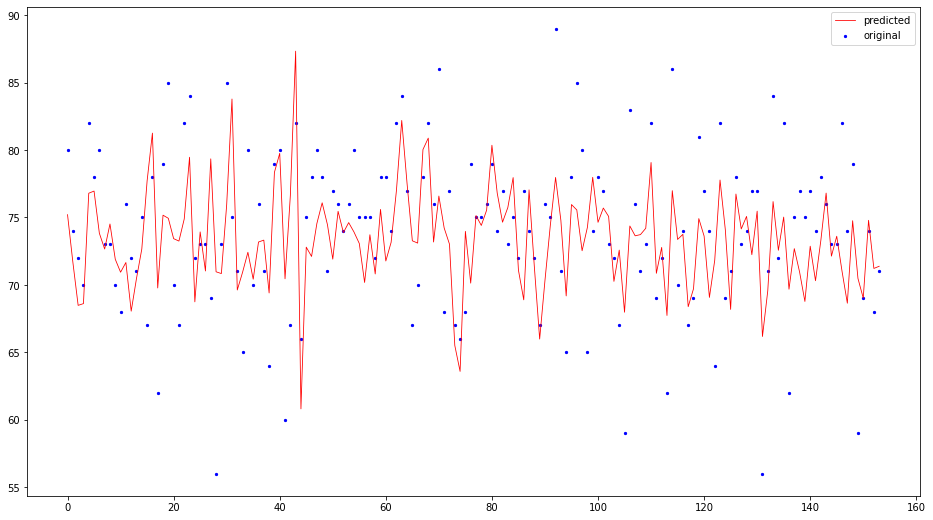

In [13]:
x_ax = range(len(y_test))
figure(figsize=(16, 9))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# **Random forest**

In [14]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'bootstrap': [True, False],
     'max_depth': [1, 2, 3, 4, 5, None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'oob_score' : [True, False],         
     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Create model
r_forest = RandomForestRegressor()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(r_forest, param_grid, cv = 10, n_jobs = -1, n_iter = 15, random_state = 27)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'oob_score': [True, False]},
                   random_state=27)

In [15]:
print(grid_search.best_params_)
print(grid_search.cv_results_['mean_test_score'])

{'oob_score': False, 'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
[       nan        nan 0.3597022  0.25472402 0.27984058 0.24051074
 0.24047001 0.32683925 0.16825544        nan        nan 0.23947912
        nan 0.342018   0.3027737 ]


### Predicting and accuracy check

In [16]:
y_pred = grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 25.53
RMSE: 5.05
MAE: 4.02
MAPE: 5.52
Accuracy: 94.48 %.
R^2: 0.32


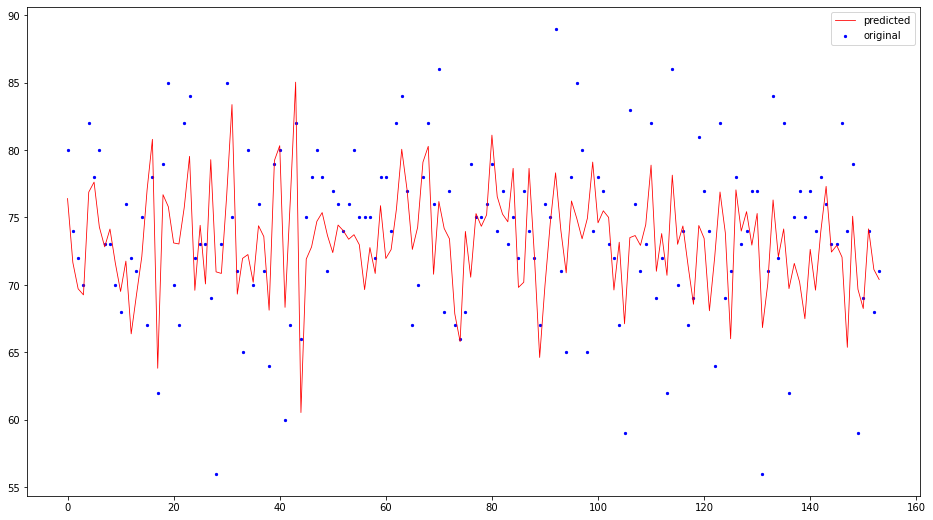

In [17]:
x_ax = range(len(y_test))
figure(figsize=(16, 9))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# **AdaBoost**

In [18]:
from sklearn.ensemble import AdaBoostRegressor

param_grid = {'n_estimators': [50, 100, 200, 300, 400, 500, 700, 1000],
              'learning_rate':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0],
              'loss':['linear', 'square', 'exponential']}

# Create model
ada_reg = AdaBoostRegressor()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(ada_reg, param_grid, cv = 10, n_jobs = -1, n_iter = 15, random_state = 27)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostRegressor(), n_iter=15, n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.05, 0.1, 0.3, 0.5,
                                                          1.0],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 700, 1000]},
                   random_state=27)

In [19]:
print(grid_search.best_params_)
print(grid_search.cv_results_['mean_test_score'])

{'n_estimators': 200, 'loss': 'exponential', 'learning_rate': 0.05}
[0.28928226 0.29171628 0.29149087 0.30015983 0.29323086 0.29188806
 0.26930476 0.26789363 0.28174588 0.30361027 0.28314749 0.29144963
 0.28618426 0.2768761  0.2929437 ]


### Predicting and accuracy check

In [20]:
y_pred = grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 26.58
RMSE: 5.16
MAE: 4.05
MAPE: 5.55
Accuracy: 94.45 %.
R^2: 0.29


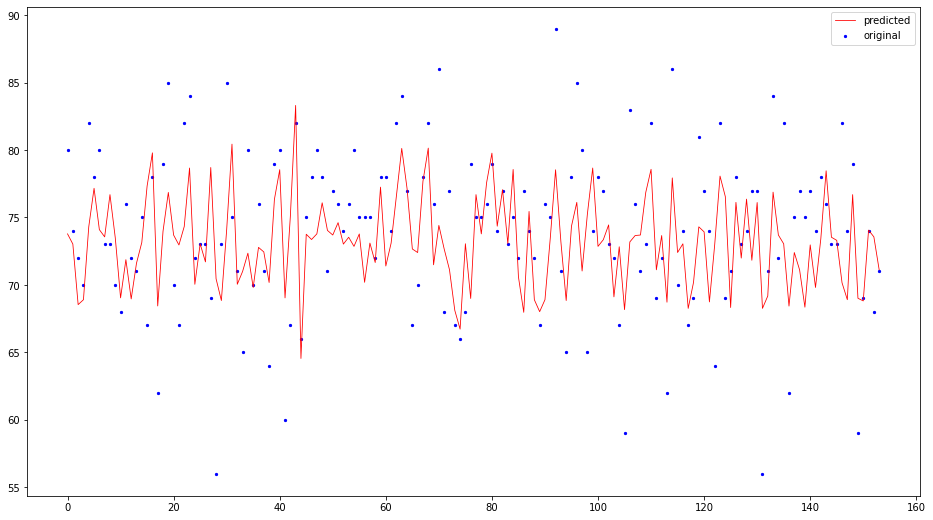

In [21]:
x_ax = range(len(y_test))
figure(figsize=(16, 9))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# **Gradient Boosting**

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = { 'max_features' : ['log2',1.0],
        'max_depth' : [1, 2, 3, 4],
        'min_samples_leaf' : [2, 3, 5, 10],
        'n_estimators': [50, 100, 200, 300, 400, 500, 700, 1000],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0],
        'loss' : ['ls','huber'] }

# Create model
gb_reg = GradientBoostingRegressor()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(gb_reg, param_grid, cv = 10, n_jobs = -1, n_iter = 15, random_state = 27)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.05, 0.1, 0.3, 0.5,
                                                          1.0],
                                        'loss': ['ls', 'huber'],
                                        'max_depth': [1, 2, 3, 4],
                                        'max_features': ['log2', 1.0],
                                        'min_samples_leaf': [2, 3, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 700, 1000]},
                   random_state=27)

In [23]:
print(grid_search.best_params_)
print(grid_search.cv_results_['mean_test_score'])

{'n_estimators': 100, 'min_samples_leaf': 5, 'max_features': 1.0, 'max_depth': 2, 'loss': 'huber', 'learning_rate': 0.3}
[0.24148516 0.09914893 0.21965609 0.31666407 0.3186149  0.01272187
 0.29754753 0.31622768 0.29335154 0.00558276 0.33517154 0.2063107
 0.2246611  0.26373029 0.32419427]


### Predicting and accuracy check

In [24]:
y_pred = grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 26.24
RMSE: 5.12
MAE: 4.11
MAPE: 5.67
Accuracy: 94.33 %.
R^2: 0.30


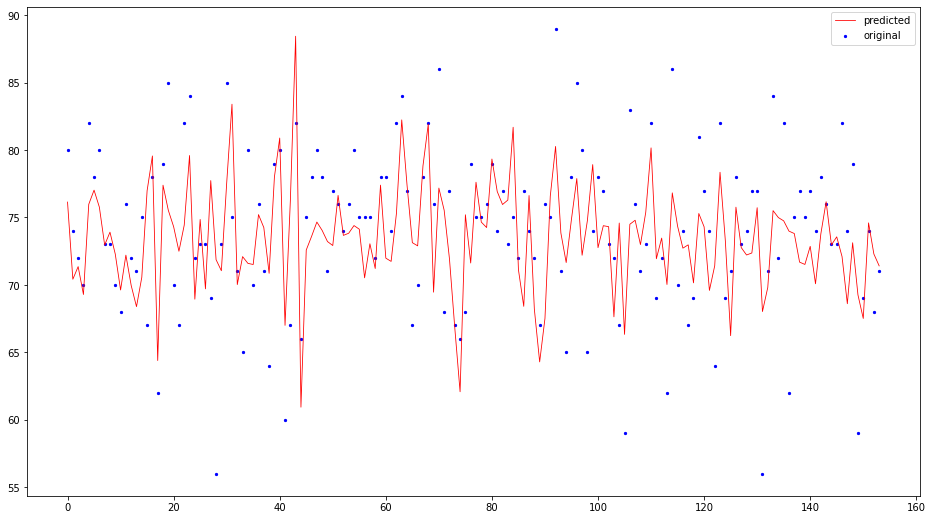

In [25]:
x_ax = range(len(y_test))
figure(figsize=(16, 9))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# **XGBoost**

In [26]:
from xgboost import XGBRegressor

param_grid = {'max_depth' : [1, 2, 3, 4, 5, 6],
        'n_estimators': list(np.arange(50,3000,20)),
        'min_child_weight': list(np.arange(1,6)),
        'learning_rate' : [0.0001, 0.001, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0],
        }

# Create model
xgb_reg = XGBRegressor()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(xgb_reg, param_grid, cv = 10, n_jobs = -1, n_iter = 15, random_state = 27)
grid_search.fit(x_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=15, n_jobs=-1,
                   para

In [27]:
print(grid_search.best_params_)
print(grid_search.cv_results_['mean_test_score'])

{'n_estimators': 1610, 'min_child_weight': 5, 'max_depth': 1, 'learning_rate': 0.1}
[-1.62664599  0.11576274  0.16976849  0.32192473 -1.28622154  0.29643043
  0.33322162  0.33011336  0.25796794  0.23176741  0.19323122  0.31768709
  0.20670876  0.16934904  0.34555986]


### Predicting and accuracy check

In [28]:
y_pred = grid_search.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

mae = mean_absolute_error(y_test, y_pred)
print("MAE: %.2f" % mae)

errors = abs(y_pred - y_test)   # Calculate the absolute errors
mape = 100 * (errors / y_test)   # Calculate mean absolute percentage error (MAPE)
print("MAPE: %.2f" % np.mean(mape))
accuracy = 100 - np.mean(mape)   # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%.')

r2 = r2_score(y_test, y_pred)
print("R^2: %.2f" % r2)

MSE: 25.80
RMSE: 5.08
MAE: 4.16
MAPE: 5.72
Accuracy: 94.28 %.
R^2: 0.31


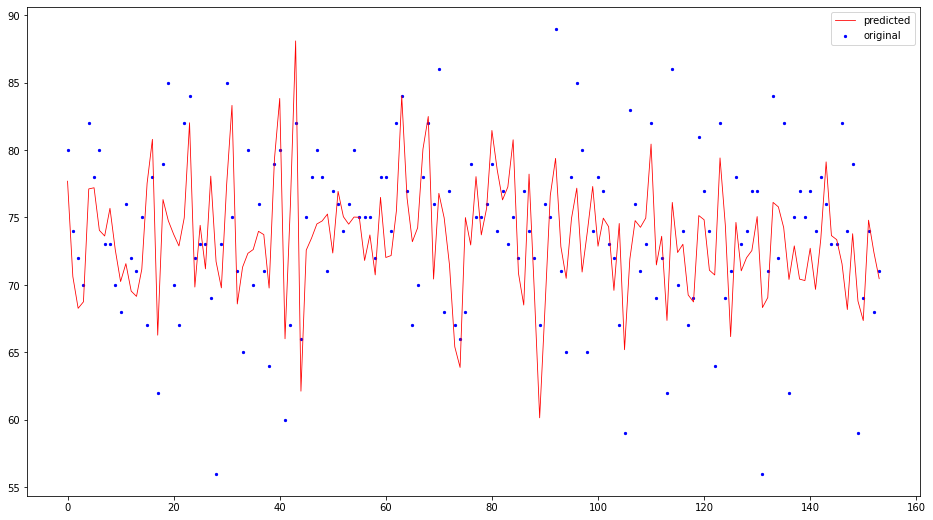

In [29]:
x_ax = range(len(y_test))
figure(figsize=(16, 9))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()